# "Test Post - Player Classification Models"
> "Testing different clasification models to predict player position"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [python, machine learning, jupyter]
- image: 
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Assigment 2

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

# Task 1: Data Retrieving

In [2]:
# Import the dataset as a dataframe
# Dataset can be found at https://www.kaggle.com/karangadiya/fifa19
# Dataset is also included in assignment zip file
df = pd.read_csv('fifa_full.csv', sep=',')

[Access Dataset Here](https://www.kaggle.com/karangadiya/fifa19)

In [3]:
# Change settings to display all columns
pd.set_option('display.max_columns', None)

# Preview the dataframe
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# For this application, we only want the players name and ID, along with their skill scores and position.
# Drop unwanted columns for the purpose of this application
# Note we dropped the Goalkeeping skills attributes, this would make it too easy for our model. 
# Plus in a real world scenario, these skills would be hard to measure for ALL players.
df = df.drop(['Unnamed: 0', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value',
              'Wage','Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
              'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
              'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
              'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GKDiving', 'GKHandling', 
              'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'], axis = 1)


In [5]:
# Check the new dataframe
df.head()

,ID,Name,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,20801,Cristiano Ronaldo,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,190871,Neymar Jr,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,193080,De Gea,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,192985,K. De Bruyne,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [6]:
# Check how many players in the dataset
df.shape

(18207, 32)

In [7]:
# Let's see how many Nulls we're dealing with
df.isnull().sum()

ID                  0
Name                0
Position           60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

In [8]:
# We can see there is about 60 possible players with NA value
# Because we already have over 18,000 players in the dataset, we will just delete them
df = df.dropna()
df.isnull().sum()

ID                 0
Name               0
Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
dtype: int64

In [9]:
# Investigate the Position attribute
df.Position.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [10]:
# Convert the current 27 positions into 4 main position disciplines, Attacker, Midfielder, Defender, Goalkeeper
att = dict.fromkeys(['ST', 'LW', 'RW', 'LS', 'RS', 'CF', 'RF', 'LF'], 'Attacker')
mid = dict.fromkeys(['CM', 'RM', 'LM', 'CAM', 'CDM', 'LCM', 'RCM', 'RDM', 'LDM', 'RAM', 'LAM'], 'Midfielder')
dfnc = dict.fromkeys(['CB', 'LB', 'RB', 'RCB', 'LCB', 'RWB', 'LWB' ], 'Defender')
df.Position.replace('GK', 'Goalkeeper', inplace=True)
df.Position.replace(att, inplace=True)
df.Position.replace(mid, inplace=True)
df.Position.replace(dfnc, inplace=True)

# Confirm the changes
df.Position.value_counts()

Midfielder    6838
Defender      5866
Attacker      3418
Goalkeeper    2025
Name: Position, dtype: int64

In [11]:
# Check for duplicate players using the players unique player ID
df.duplicated('ID').sum()

0

# Task 2: Data Exploration

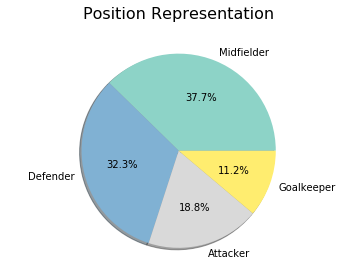

In [12]:
# Create a pie chart showing the percentage of each position represented in the dataset
df.Position.value_counts().plot(kind = 'pie',
                                autopct = '%0.1f%%',
                                shadow = True,
                                cmap = 'Set3'
                                )
plt.title('Position Representation\n', fontsize = 16 )
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.show()

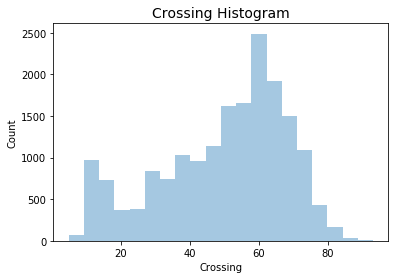

Crossing
count    18147.000000
mean        49.738414
std         18.364255
min          5.000000
25%         38.000000
50%         54.000000
75%         64.000000
max         93.000000
Name: Crossing, dtype: float64





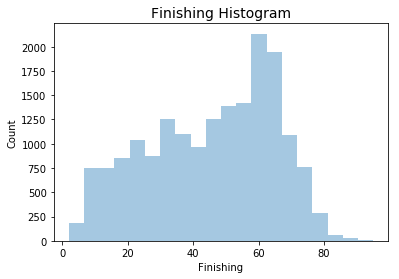

Finishing
count    18147.000000
mean        45.550229
std         19.527445
min          2.000000
25%         30.000000
50%         49.000000
75%         62.000000
max         95.000000
Name: Finishing, dtype: float64





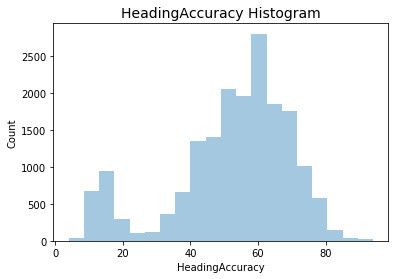

HeadingAccuracy
count    18147.000000
mean        52.300766
std         17.381753
min          4.000000
25%         44.000000
50%         56.000000
75%         64.000000
max         94.000000
Name: HeadingAccuracy, dtype: float64





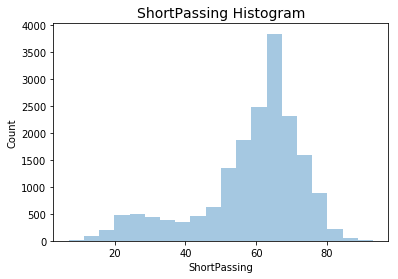

ShortPassing
count    18147.000000
mean        58.695432
std         14.696075
min          7.000000
25%         54.000000
50%         62.000000
75%         68.000000
max         93.000000
Name: ShortPassing, dtype: float64





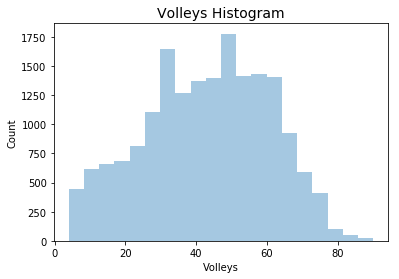

Volleys
count    18147.000000
mean        42.912217
std         17.695900
min          4.000000
25%         30.000000
50%         44.000000
75%         57.000000
max         90.000000
Name: Volleys, dtype: float64





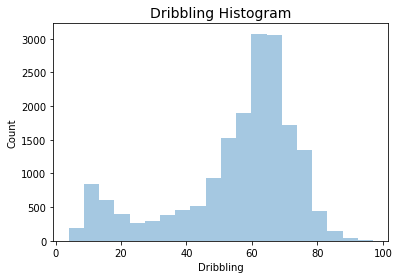

Dribbling
count    18147.000000
mean        55.375158
std         18.912224
min          4.000000
25%         49.000000
50%         61.000000
75%         68.000000
max         97.000000
Name: Dribbling, dtype: float64





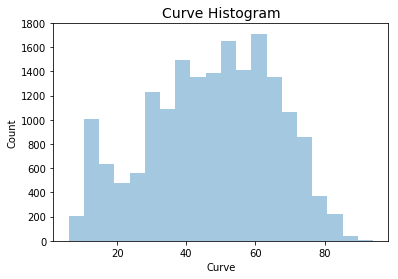

Curve
count    18147.000000
mean        47.176283
std         18.396009
min          6.000000
25%         34.000000
50%         48.000000
75%         62.000000
max         94.000000
Name: Curve, dtype: float64





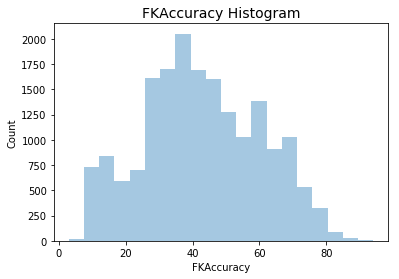

FKAccuracy
count    18147.000000
mean        42.866038
std         17.480034
min          3.000000
25%         31.000000
50%         41.000000
75%         57.000000
max         94.000000
Name: FKAccuracy, dtype: float64





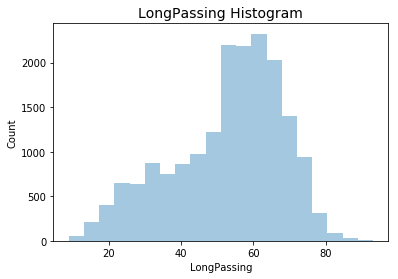

LongPassing
count    18147.000000
mean        52.721386
std         15.325211
min          9.000000
25%         43.000000
50%         56.000000
75%         64.000000
max         93.000000
Name: LongPassing, dtype: float64





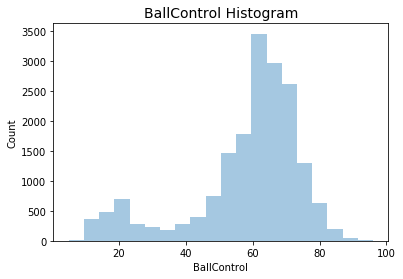

BallControl
count    18147.000000
mean        58.374828
std         16.685643
min          5.000000
25%         54.000000
50%         63.000000
75%         69.000000
max         96.000000
Name: BallControl, dtype: float64





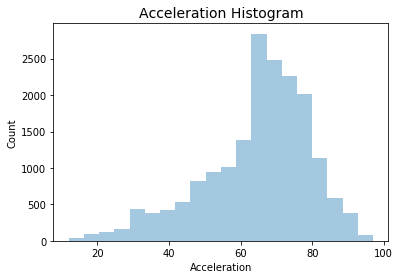

Acceleration
count    18147.000000
mean        64.612829
std         14.930320
min         12.000000
25%         57.000000
50%         67.000000
75%         75.000000
max         97.000000
Name: Acceleration, dtype: float64





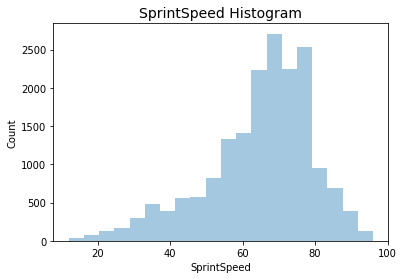

SprintSpeed
count    18147.000000
mean        64.726236
std         14.651776
min         12.000000
25%         57.000000
50%         67.000000
75%         75.000000
max         96.000000
Name: SprintSpeed, dtype: float64





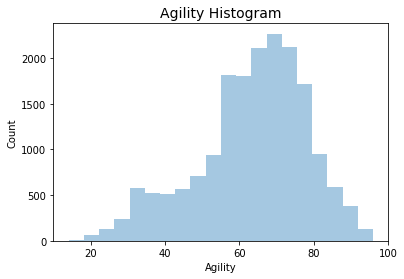

Agility
count    18147.000000
mean        63.501295
std         14.768956
min         14.000000
25%         55.000000
50%         66.000000
75%         74.000000
max         96.000000
Name: Agility, dtype: float64





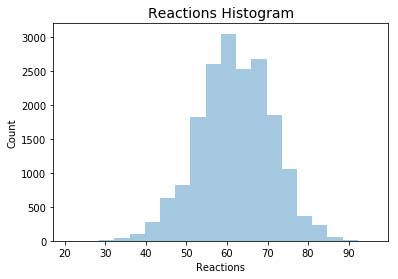

Reactions
count    18147.000000
mean        61.839147
std          9.011056
min         21.000000
25%         56.000000
50%         62.000000
75%         68.000000
max         96.000000
Name: Reactions, dtype: float64





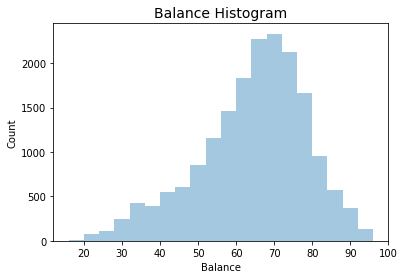

Balance
count    18147.000000
mean        63.964292
std         14.136073
min         16.000000
25%         56.000000
50%         66.000000
75%         74.000000
max         96.000000
Name: Balance, dtype: float64





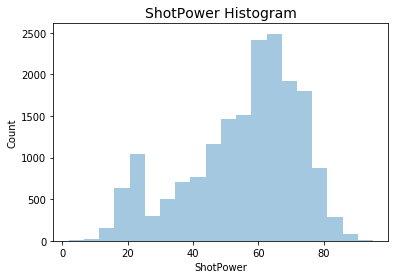

ShotPower
count    18147.000000
mean        55.465201
std         17.235534
min          2.000000
25%         45.000000
50%         59.000000
75%         68.000000
max         95.000000
Name: ShotPower, dtype: float64





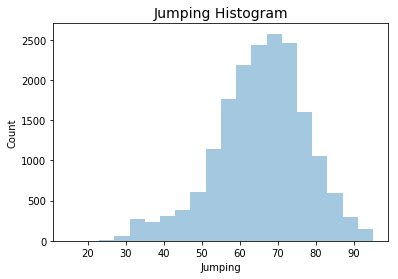

Jumping
count    18147.000000
mean        65.091034
std         11.822327
min         15.000000
25%         58.000000
50%         66.000000
75%         73.000000
max         95.000000
Name: Jumping, dtype: float64





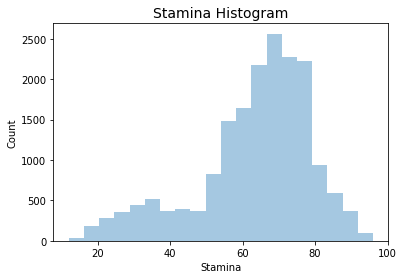

Stamina
count    18147.000000
mean        63.221579
std         15.896381
min         12.000000
25%         56.000000
50%         66.000000
75%         74.000000
max         96.000000
Name: Stamina, dtype: float64





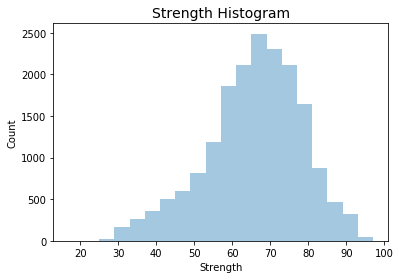

Strength
count    18147.000000
mean        65.318620
std         12.552479
min         17.000000
25%         58.000000
50%         67.000000
75%         74.000000
max         97.000000
Name: Strength, dtype: float64





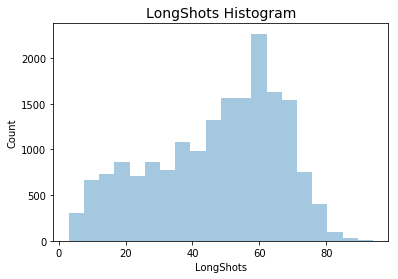

LongShots
count    18147.000000
mean        47.113187
std         19.263142
min          3.000000
25%         33.000000
50%         51.000000
75%         62.000000
max         94.000000
Name: LongShots, dtype: float64





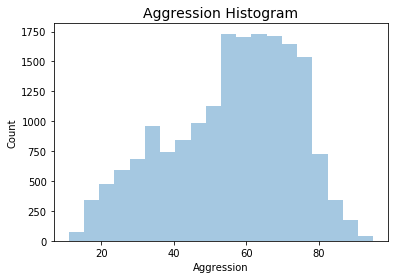

Aggression
count    18147.000000
mean        55.876068
std         17.366534
min         11.000000
25%         44.000000
50%         59.000000
75%         69.000000
max         95.000000
Name: Aggression, dtype: float64





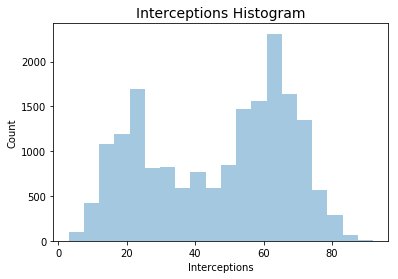

Interceptions
count    18147.000000
mean        46.702761
std         20.697462
min          3.000000
25%         26.000000
50%         52.000000
75%         64.000000
max         92.000000
Name: Interceptions, dtype: float64





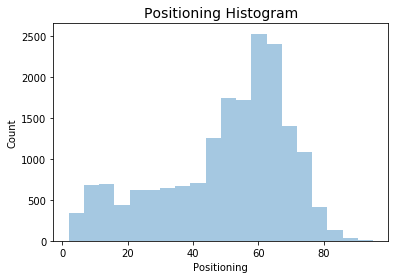

Positioning
count    18147.000000
mean        49.962198
std         19.530469
min          2.000000
25%         38.000000
50%         55.000000
75%         64.000000
max         95.000000
Name: Positioning, dtype: float64





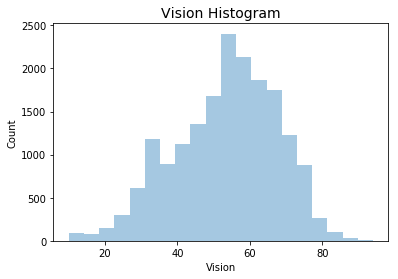

Vision
count    18147.000000
mean        53.407781
std         14.146594
min         10.000000
25%         44.000000
50%         55.000000
75%         64.000000
max         94.000000
Name: Vision, dtype: float64





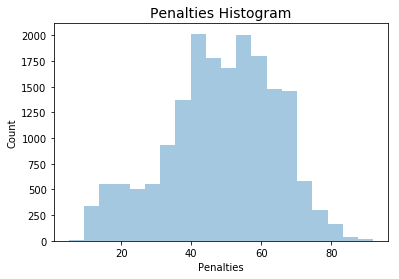

Penalties
count    18147.000000
mean        48.546371
std         15.703113
min          5.000000
25%         39.000000
50%         49.000000
75%         60.000000
max         92.000000
Name: Penalties, dtype: float64





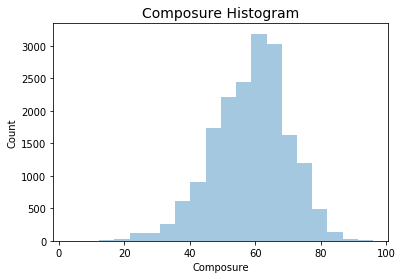

Composure
count    18147.000000
mean        58.651127
std         11.437138
min          3.000000
25%         51.000000
50%         60.000000
75%         67.000000
max         96.000000
Name: Composure, dtype: float64





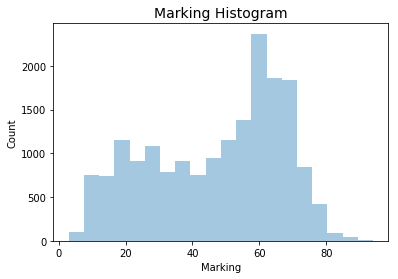

Marking
count    18147.000000
mean        47.286053
std         19.900450
min          3.000000
25%         30.000000
50%         53.000000
75%         64.000000
max         94.000000
Name: Marking, dtype: float64





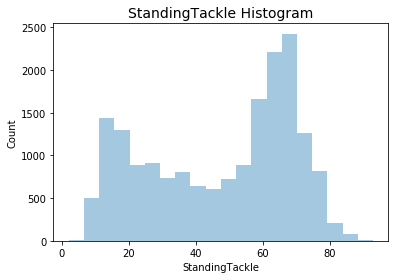

StandingTackle
count    18147.000000
mean        47.701879
std         21.663630
min          2.000000
25%         27.000000
50%         55.000000
75%         66.000000
max         93.000000
Name: StandingTackle, dtype: float64





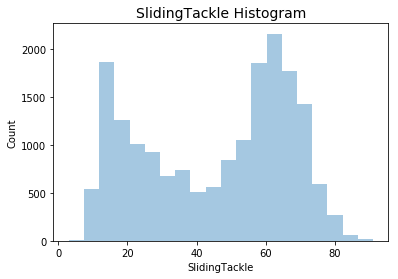

SlidingTackle
count    18147.000000
mean        45.666336
std         21.287961
min          3.000000
25%         24.000000
50%         52.000000
75%         64.000000
max         91.000000
Name: SlidingTackle, dtype: float64





In [13]:
# Create a histogram for each column and also return min, max, mean and median.
# Each of these columns should range between 0 and 100.
# The histogram and the min, max, mean values should provide us a quick way to validate the data.
# Use a for loop to cycle through the attributes
for column in df.iloc[:,3:]:
    sns.distplot(df[column], kde = False, bins = 20)
    plt.title(str(df[column].name) + " Histogram", fontsize = 14)
    plt.ylabel("Count")
    plt.show()
    print df[column].name 
    print df[column].describe()
    print "\n\n"

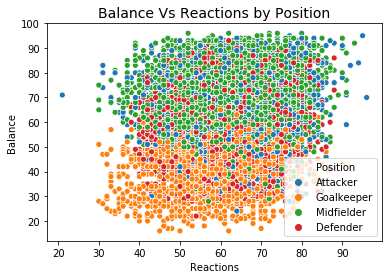

In [14]:
# Create a scatterplot
sns.scatterplot(x = "Reactions", 
                y = "Balance", 
                hue = "Position", 
                data = df,
                )
plt.title('Balance Vs Reactions by Position', fontsize = 14)
plt.show()

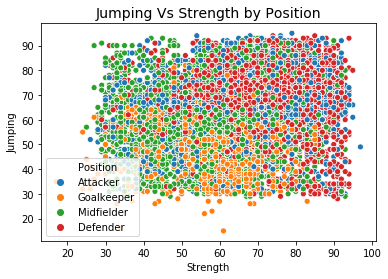

In [15]:
# Create a scatterplot
sns.scatterplot(x = "Strength", 
                y = "Jumping", 
                hue = "Position", 
                data = df,
                )
plt.title('Jumping Vs Strength by Position', fontsize = 14)
plt.show()

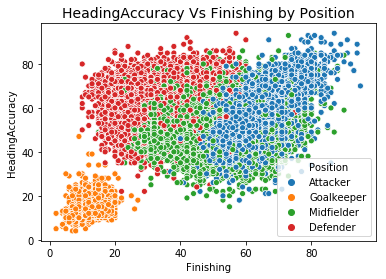

In [16]:
# Create a scatterplot
sns.scatterplot(x = "Finishing", 
                y = "HeadingAccuracy", 
                hue = "Position", 
                data = df,
                )
plt.title('HeadingAccuracy Vs Finishing by Position', fontsize = 14)
plt.show()

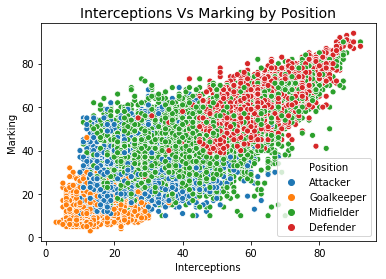

In [17]:
# Create a scatterplot
sns.scatterplot(x = "Interceptions", 
                y = "Marking", 
                hue = "Position", 
                data = df,
                )
plt.title('Interceptions Vs Marking by Position', fontsize = 14)
plt.show()

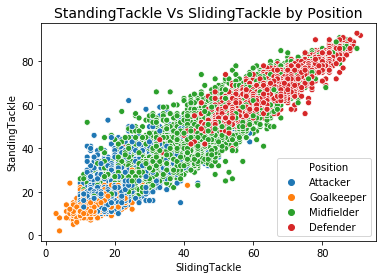

In [18]:
# Create a scatterplot
sns.scatterplot(x = "SlidingTackle", 
                y = "StandingTackle", 
                hue = "Position", 
                data = df,
                )
plt.title('StandingTackle Vs SlidingTackle by Position', fontsize = 14)
plt.show()

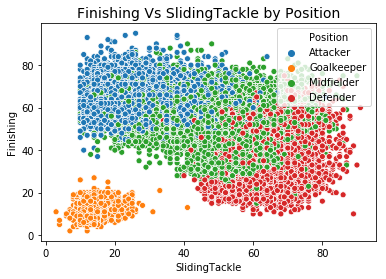

In [19]:
# Create a scatterplot
sns.scatterplot(x = "SlidingTackle", 
                y = "Finishing", 
                hue = "Position", 
                data = df,
                )
plt.title('Finishing Vs SlidingTackle by Position', fontsize = 14)
plt.show()

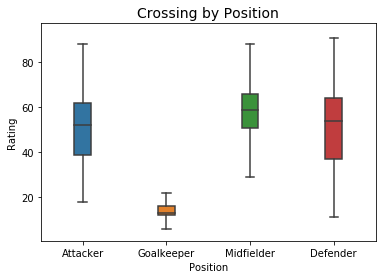

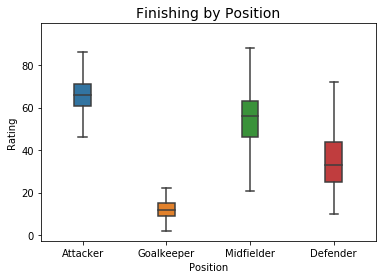

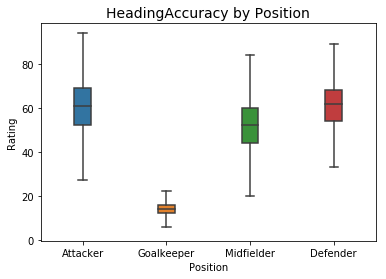

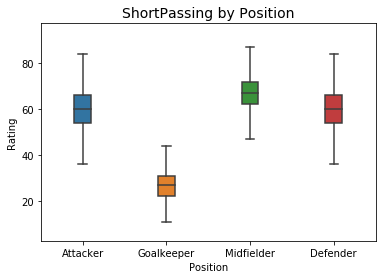

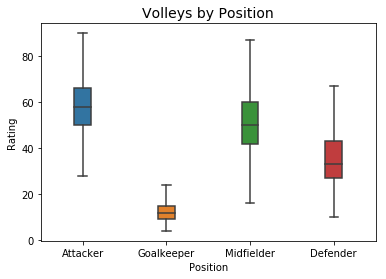

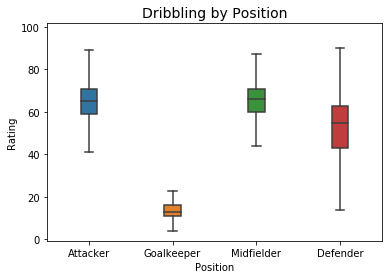

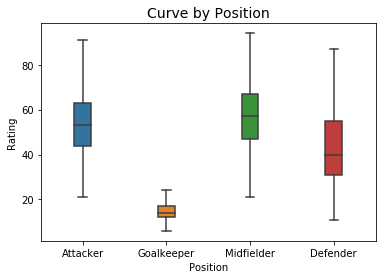

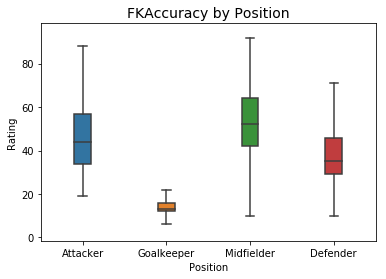

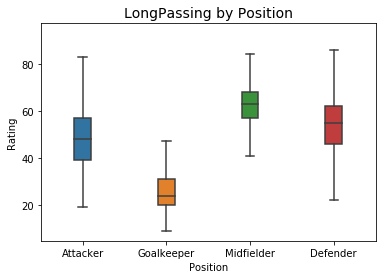

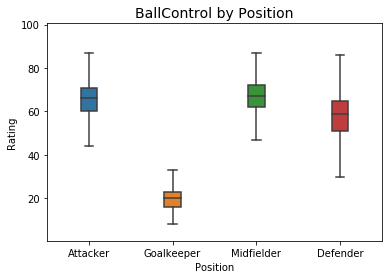

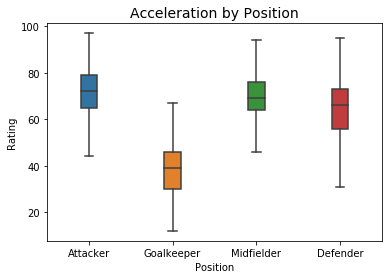

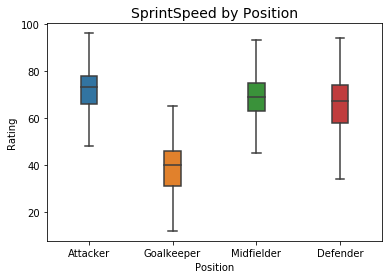

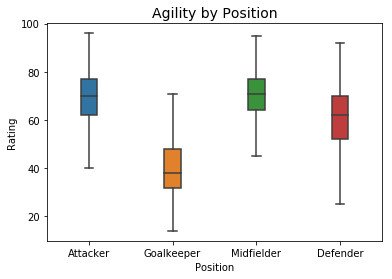

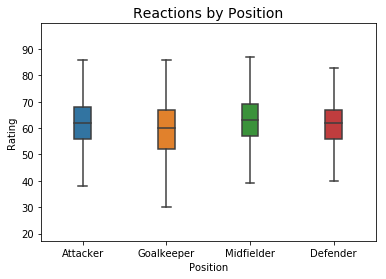

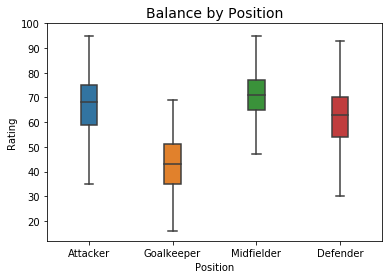

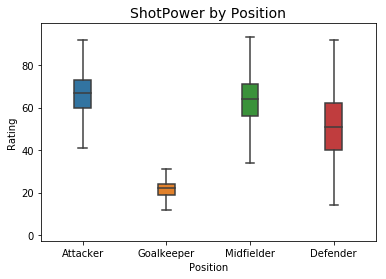

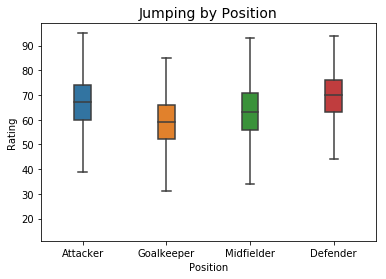

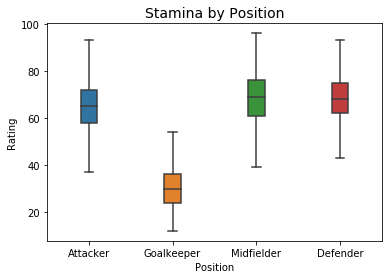

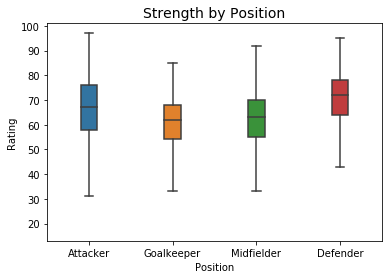

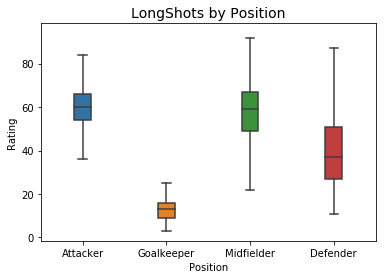

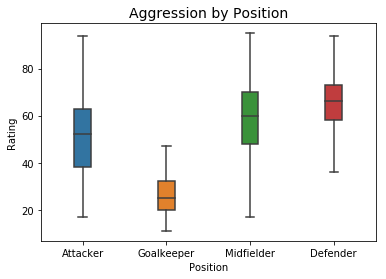

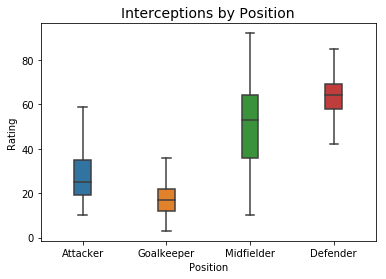

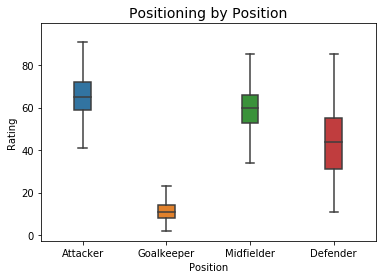

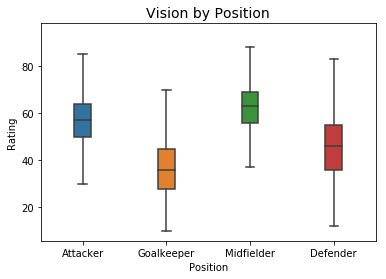

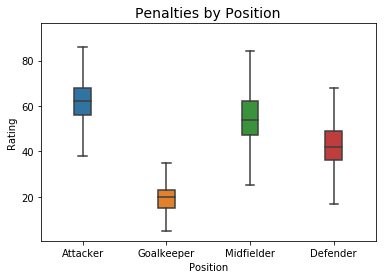

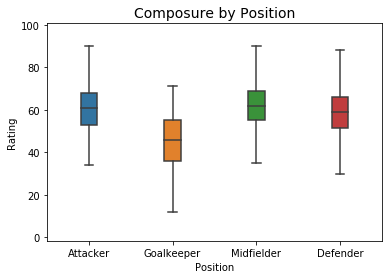

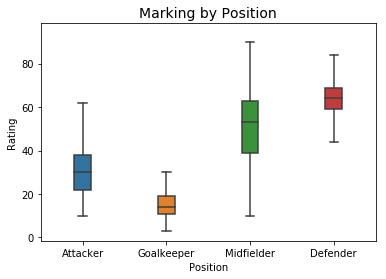

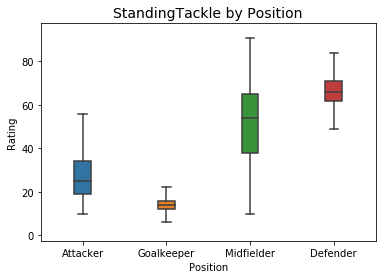

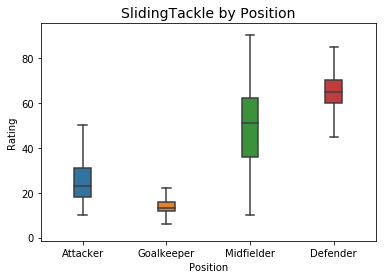

In [20]:
# Create box plots for all the skill attributes using a for loop
# The box plots will show which Positions excel in each skill
# Outliers removed for cleaner plots
for column in df.iloc[:,3:]:
    sns.boxplot(x = 'Position',
                y = df[column], 
                data = df,
                width = 0.2,
                fliersize = 0
               )
    plt.title(str(df[column].name) + " by Position", fontsize = 14)
    plt.ylabel("Rating")
    plt.show()

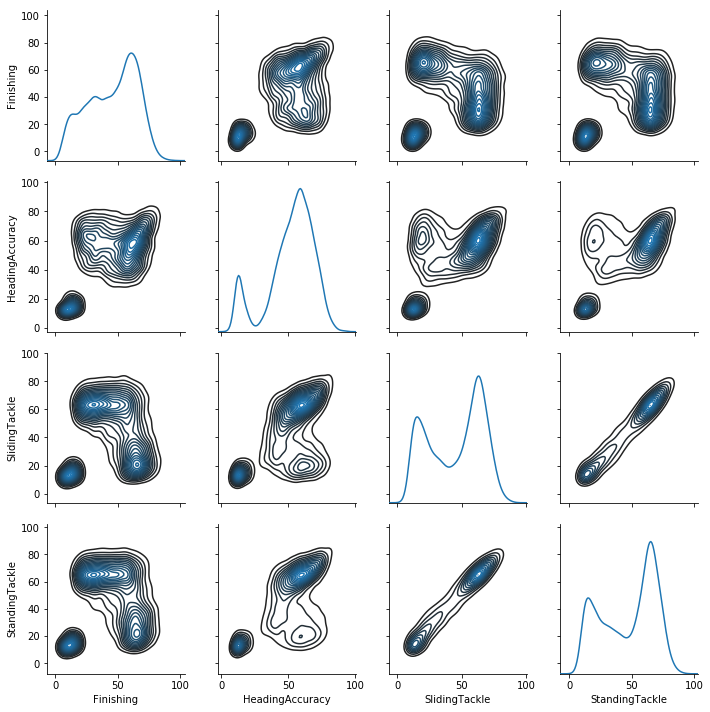

In [21]:
# Create a subset based on 4 specialised skills
# Plot the 4 skills in a kde matrix to try an identify clusters
special_skills = df[['Finishing', 'HeadingAccuracy','SlidingTackle', 'StandingTackle']]
g = sns.PairGrid(special_skills)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 20)
plt.show()

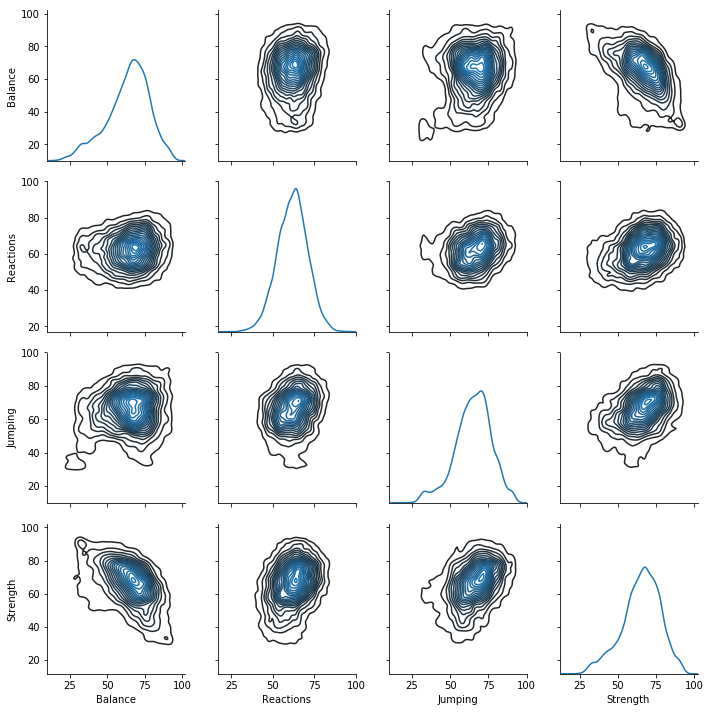

In [22]:
# Create a subset based on 4 general skills
# Plot the 4 skills in a kde matrix to try an identify clusters
general_skills = df[['Balance', 'Reactions', 'Jumping', 'Strength']]
g = sns.PairGrid(general_skills)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 20)
plt.show()

# Task 3: Data Modelling: Classification

In [23]:
# Check that our features ie skill columns are ints or floats
df.dtypes

ID                   int64
Name                object
Position            object
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
dtype: object

## Decision Tree 1: 50% Training Set, 50% Test Set

### Set the Features, Outcomes and Training/Test Set

In [24]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = df[feature_cols]

# Assign the outcomes
y = df.Position

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1984)





### Identify the best max_depth value. Keep the max value at 5 as we want to minimise the nodes significantly 

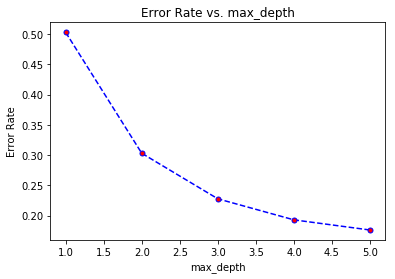

In [25]:
# Identify the best value for max_depth
error_rate = []

# Set the range of potential max_depth
# Run clf for each max_depth in the range
for i in range(1,6):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = i, # Default None
                                 min_samples_split = 2, # Default 2
                                 min_samples_leaf = 1 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a max_depth value
plt.plot(range(1,6), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

### max_depth chosen is 5
#### Now check min_samples_split, we want the highest value for the lowest error to minimise overfitting

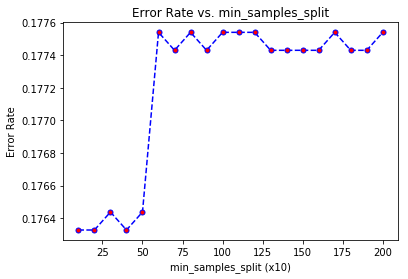

In [26]:
# Identify the best value for min_samples_split
error_rate = []

# Set the range of potential min_samples_split
# Run clf for each mmin_samples_split in the range
for i in range(10,210,10):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = i, # Default 2
                                 min_samples_leaf = 1 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a min_samples_split value
plt.plot(range(10,210,10), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. min_samples_split')
plt.xlabel('min_samples_split (x10)')
plt.ylabel('Error Rate')
plt.show()

### min_sample_split chosen is 50
#### Now check min_samples_leaf, we want the highest value for the lowest error to minimise overfitting

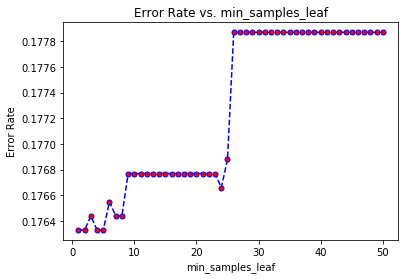

In [27]:
# Identify the best value for min_samples_leaf
error_rate = []

# Set the range of potential min_samples_leaf
# Run clf for each min_samples_leaf in the range
for i in range(1,51):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = 50, # Default 2
                                 min_samples_leaf = i # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a min_samples_leaf value
plt.plot(range(1,51), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Error Rate')
plt.show()

### min_sample_leaf chosen is 8
#### Now check max_features, we want the lowest value for the lowest error

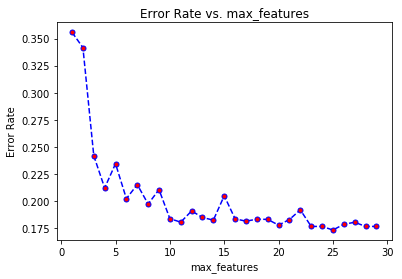

In [28]:
# Identify the best value for max_features
error_rate = []

# Set the range of potential max_features
# Run clf for each max_features in the range
for i in range(1,30):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = i, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = 50, # Default 2
                                 min_samples_leaf = 8 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a max_features value
plt.plot(range(1,30), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. max_features')
plt.xlabel('max_features')
plt.ylabel('Error Rate')
plt.show()

### max_features chosen is None

## Build the Decision Tree Classifier with the default parameters

In [29]:
# Build the Decision Tree Model
clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                             max_features = None, # Default None
                             max_depth = None, # Default None
                             min_samples_split = 2, # Default 2
                             min_samples_leaf = 1 # Default 1 
                             )

# Train the model on the training set
fit = clf.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(clf, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

# Set the model node count to a variable
nds = clf.tree_.node_count

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Number of Nodes in Model: ",nds
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  80.85%
Cross Validation Accuracy:  79.25%
Model Fitting:  1.59% Overfitted
Number of Nodes in Model:  1707
Error Rate:  19.15%



Confusion Matrix: 

[[1220   20    0  446]
 [  19 2516    0  412]
 [   0    1 1002    0]
 [ 419  421    0 2598]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.74      0.72      0.73      1686
    Defender       0.85      0.85      0.85      2947
  Goalkeeper       1.00      1.00      1.00      1003
  Midfielder       0.75      0.76      0.75      3438

   micro avg       0.81      0.81      0.81      9074
   macro avg       0.83      0.83      0.83      9074
weighted avg       0.81      0.81      0.81      9074



## Now build the model with the tuned parameters

In [30]:
# Build the Decision Tree Model
clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                             max_features = None, # Default None
                             max_depth = 5, # Default None
                             min_samples_split = 50, # Default 2
                             min_samples_leaf = 8 # Default 1 
                             )

# Train the model on the training set
fit = clf.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(clf, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

# Set the model node count to a variable
nds = clf.tree_.node_count

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Number of Nodes in Model: ",nds
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  82.36%
Cross Validation Accuracy:  81.03%
Model Fitting:  1.33% Overfitted
Number of Nodes in Model:  51
Error Rate:  17.64%



Confusion Matrix: 

[[1240   12    0  434]
 [  11 2540    0  396]
 [   0    1 1001    1]
 [ 283  463    0 2692]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.81      0.74      0.77      1686
    Defender       0.84      0.86      0.85      2947
  Goalkeeper       1.00      1.00      1.00      1003
  Midfielder       0.76      0.78      0.77      3438

   micro avg       0.82      0.82      0.82      9074
   macro avg       0.85      0.84      0.85      9074
weighted avg       0.82      0.82      0.82      9074



## Outcome:
Tuning the model improves performance in all areas as seen by the output



## Decision Tree 2: 60% Training Set, 40% Test Set

### Set the Features, Outcomes and Training/Test Set

In [31]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = df[feature_cols]

# Assign the outcomes
y = df.Position

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1984)





### Identify the best max_depth value. Keep the max value at 5 as we want to minimise the nodes significantly 

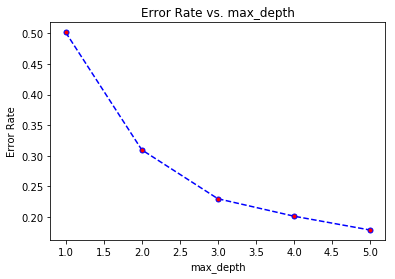

In [32]:
# Identify the best value for max_depth
error_rate = []

# Set the range of potential max_depth
# Run clf for each max_depth in the range
for i in range(1,6):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = i, # Default None
                                 min_samples_split = 2, # Default 2
                                 min_samples_leaf = 1 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a max_depth value
plt.plot(range(1,6), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

### max_depth chosen is 5
#### Now check min_samples_split, we want the highest value for the lowest error to minimise overfitting

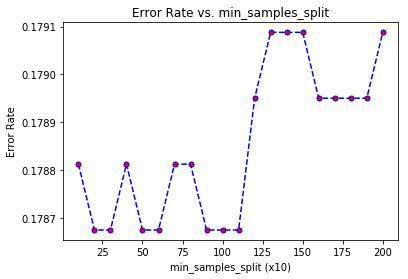

In [33]:
# Identify the best value for min_samples_split
error_rate = []

# Set the range of potential min_samples_split
# Run clf for each mmin_samples_split in the range
for i in range(10,210,10):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = i, # Default 2
                                 min_samples_leaf = 1 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a min_samples_split value
plt.plot(range(10,210,10), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. min_samples_split')
plt.xlabel('min_samples_split (x10)')
plt.ylabel('Error Rate')
plt.show()

### min_sample_split chosen is 100
#### Now check min_samples_leaf, we want the highest value for the lowest error to minimise overfitting

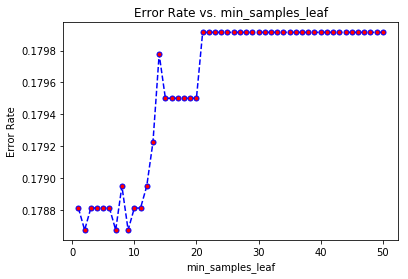

In [34]:
# Identify the best value for min_samples_leaf
error_rate = []

# Set the range of potential min_samples_leaf
# Run clf for each min_samples_leaf in the range
for i in range(1,51):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = 100, # Default 2
                                 min_samples_leaf = i # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a min_samples_leaf value
plt.plot(range(1,51), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Error Rate')
plt.show()

### min_sample_leaf chosen is 7
#### Now check max_features, we want the lowest value for the lowest error

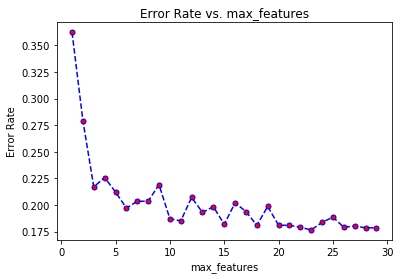

In [35]:
# Identify the best value for max_features
error_rate = []

# Set the range of potential max_features
# Run clf for each max_features in the range
for i in range(1,30):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = i, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = 100, # Default 2
                                 min_samples_leaf = 7 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a max_features value
plt.plot(range(1,30), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. max_features')
plt.xlabel('max_features')
plt.ylabel('Error Rate')
plt.show()

### max_features chosen is 20

## Build the Decision Tree Classifier with the default parameters

In [36]:
# Build the Decision Tree Model
clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                             max_features = None, # Default None
                             max_depth = None, # Default None
                             min_samples_split = 2, # Default 2
                             min_samples_leaf = 1 # Default 1 
                             )

# Train the model on the training set
fit = clf.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(clf, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

# Set the model node count to a variable
nds = clf.tree_.node_count

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Number of Nodes in Model: ",nds
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  80.7%
Cross Validation Accuracy:  79.05%
Model Fitting:  1.65% Overfitted
Number of Nodes in Model:  2035
Error Rate:  19.3%



Confusion Matrix: 

[[1023    9    0  335]
 [  14 2002    0  310]
 [   1    0  808    0]
 [ 395  337    0 2025]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.71      0.75      0.73      1367
    Defender       0.85      0.86      0.86      2326
  Goalkeeper       1.00      1.00      1.00       809
  Midfielder       0.76      0.73      0.75      2757

   micro avg       0.81      0.81      0.81      7259
   macro avg       0.83      0.84      0.83      7259
weighted avg       0.81      0.81      0.81      7259



## Now build the model with the tuned parameters

In [37]:
# Build the Decision Tree Model
clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                             max_features = 20, # Default None
                             max_depth = 5, # Default None
                             min_samples_split = 100, # Default 2
                             min_samples_leaf = 7 # Default 1 
                             )

# Train the model on the training set
fit = clf.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(clf, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

# Set the model node count to a variable
nds = clf.tree_.node_count

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Number of Nodes in Model: ",nds
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  82.01%
Cross Validation Accuracy:  80.91%
Model Fitting:  1.1% Overfitted
Number of Nodes in Model:  51
Error Rate:  17.99%



Confusion Matrix: 

[[1012   11    0  344]
 [   8 2089    0  229]
 [   0    1  807    1]
 [ 214  498    0 2045]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.82      0.74      0.78      1367
    Defender       0.80      0.90      0.85      2326
  Goalkeeper       1.00      1.00      1.00       809
  Midfielder       0.78      0.74      0.76      2757

   micro avg       0.82      0.82      0.82      7259
   macro avg       0.85      0.84      0.85      7259
weighted avg       0.82      0.82      0.82      7259



## Outcome:
Tuning the model improves performance in all areas as seen by the output


## Decision Tree 3: 80% Training Set, 20% Test Set

### Set the Features, Outcomes and Training/Test Set

In [38]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = df[feature_cols]

# Assign the outcomes
y = df.Position

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1984)





### Identify the best max_depth value. Keep the max value at 5 as we want to minimise the nodes significantly 

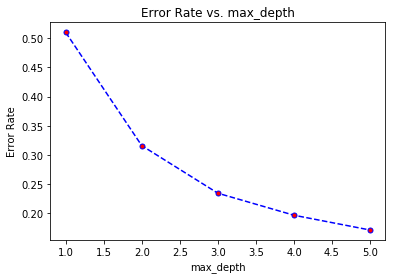

In [39]:
# Identify the best value for max_depth
error_rate = []

# Set the range of potential max_depth
# Run clf for each max_depth in the range
for i in range(1,6):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = i, # Default None
                                 min_samples_split = 2, # Default 2
                                 min_samples_leaf = 1 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a max_depth value
plt.plot(range(1,6), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

### max_depth chosen is 5
#### Now check min_samples_split, we want the highest value for the lowest error to minimise overfitting

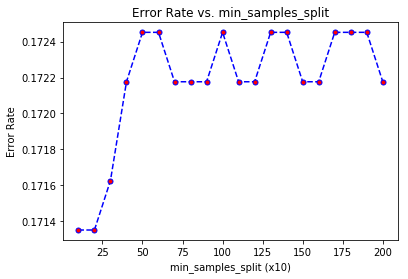

In [40]:
# Identify the best value for min_samples_split
error_rate = []

# Set the range of potential min_samples_split
# Run clf for each mmin_samples_split in the range
for i in range(10,210,10):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = i, # Default 2
                                 min_samples_leaf = 1 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a min_samples_split value
plt.plot(range(10,210,10), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. min_samples_split')
plt.xlabel('min_samples_split (x10)')
plt.ylabel('Error Rate')
plt.show()

### min_sample_split chosen is 20
#### Now check min_samples_leaf, we want the highest value for the lowest error to minimise overfitting

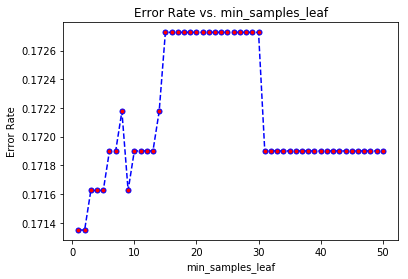

In [41]:
# Identify the best value for min_samples_leaf
error_rate = []

# Set the range of potential min_samples_leaf
# Run clf for each min_samples_leaf in the range
for i in range(1,51):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = None, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = 20, # Default 2
                                 min_samples_leaf = i # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a min_samples_leaf value
plt.plot(range(1,51), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Error Rate')
plt.show()

### min_sample_leaf chosen is 5
#### Now check max_features, we want the lowest value for the lowest error

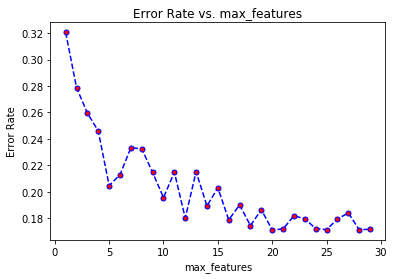

In [42]:
# Identify the best value for max_features
error_rate = []

# Set the range of potential max_features
# Run clf for each max_features in the range
for i in range(1,30):
    clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                                 max_features = i, # Default None
                                 max_depth = 5, # Default None
                                 min_samples_split = 20, # Default 2
                                 min_samples_leaf = 5 # Default 1 
                                 )
    fit = clf.fit(X_train, y_train)
    pred_i = fit.predict(X_test)

    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))
    
# Plot the error rates and choose a max_features value
plt.plot(range(1,30), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. max_features')
plt.xlabel('max_features')
plt.ylabel('Error Rate')
plt.show()

### max_features chosen is 23

## Build the Decision Tree Classifier with the default parameters

In [43]:
# Build the Decision Tree Model
clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                             max_features = None, # Default None
                             max_depth = None, # Default None
                             min_samples_split = 2, # Default 2
                             min_samples_leaf = 1 # Default 1 
                             )

# Train the model on the training set
fit = clf.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(clf, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

# Set the model node count to a variable
nds = clf.tree_.node_count

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Number of Nodes in Model: ",nds
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  82.01%
Cross Validation Accuracy:  79.2%
Model Fitting:  2.81% Overfitted
Number of Nodes in Model:  2715
Error Rate:  17.99%



Confusion Matrix: 

[[ 519    3    0  184]
 [   5 1001    0  128]
 [   0    0  402    0]
 [ 174  159    0 1055]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.74      0.74      0.74       706
    Defender       0.86      0.88      0.87      1134
  Goalkeeper       1.00      1.00      1.00       402
  Midfielder       0.77      0.76      0.77      1388

   micro avg       0.82      0.82      0.82      3630
   macro avg       0.84      0.84      0.84      3630
weighted avg       0.82      0.82      0.82      3630



## Now build the model with the tuned parameters

In [44]:
# Build the Decision Tree Model
clf = DecisionTreeClassifier(criterion = 'gini', # Default gini
                             max_features = 23, # Default None
                             max_depth = 5, # Default None
                             min_samples_split = 20, # Default 2
                             min_samples_leaf = 5 # Default 1 
                             )

# Train the model on the training set
fit = clf.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(clf, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

# Set the model node count to a variable
nds = clf.tree_.node_count

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Number of Nodes in Model: ",nds
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  82.42%
Cross Validation Accuracy:  80.71%
Model Fitting:  1.72% Overfitted
Number of Nodes in Model:  51
Error Rate:  17.58%



Confusion Matrix: 

[[ 523    8    0  175]
 [   1 1046    0   87]
 [   0    1  400    1]
 [ 106  259    0 1023]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.83      0.74      0.78       706
    Defender       0.80      0.92      0.85      1134
  Goalkeeper       1.00      1.00      1.00       402
  Midfielder       0.80      0.74      0.77      1388

   micro avg       0.82      0.82      0.82      3630
   macro avg       0.86      0.85      0.85      3630
weighted avg       0.83      0.82      0.82      3630



## Outcome:
Tuning the model improves performance in all areas as seen by the output

## Decision Tree Classifier Outcome:
The best performing model was the one built on the 80% training set based on the output of each model. 


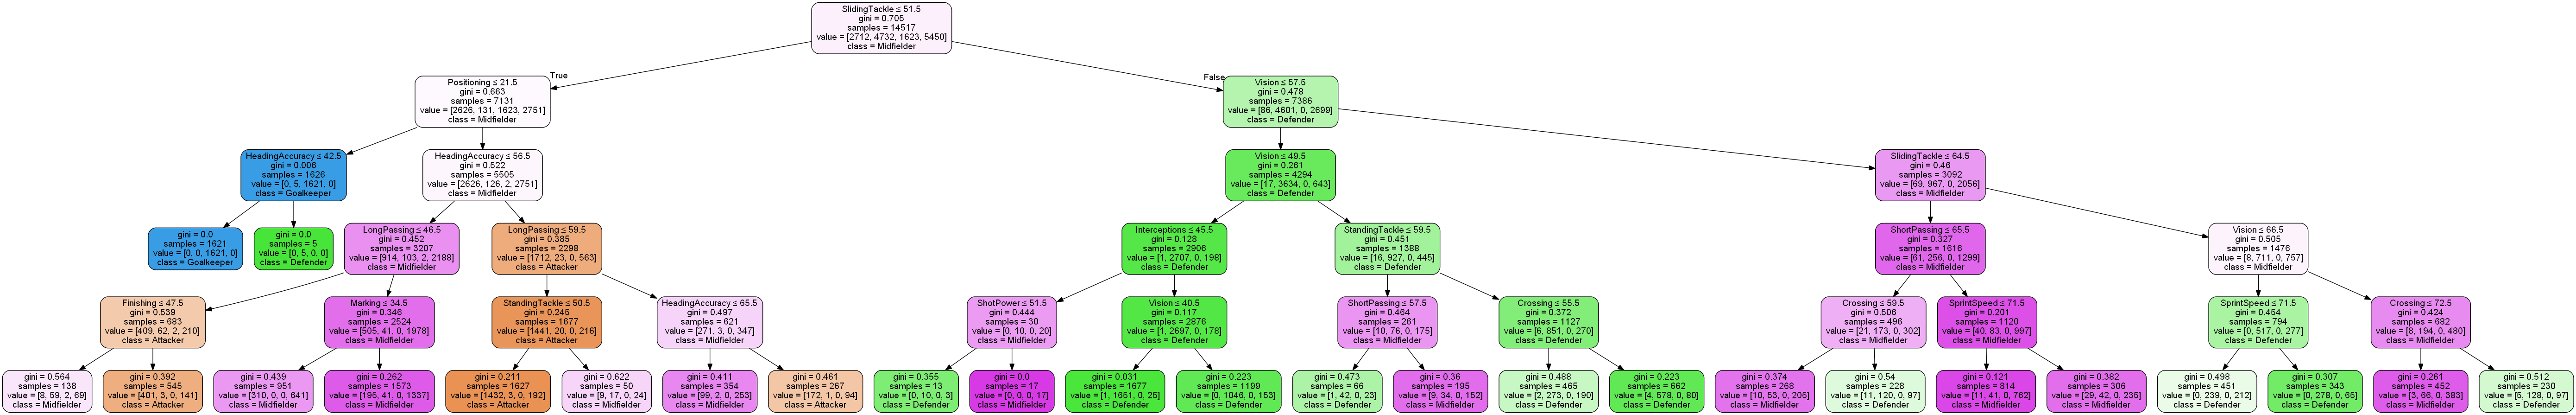

In [45]:
# Draw the model
dot_data = StringIO()
export_graphviz(fit, 
                out_file = dot_data, 
                filled = True, 
                rounded = True,
                special_characters = True,
                feature_names = feature_cols, 
                class_names = ['Attacker', 'Defender', 'Goalkeeper', 'Midfielder']
               ) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fifa-clf.png')
Image(graph.create_png())

## KNN 1: 50% Training Set, 50% Test Set

### Set the Features, Outcomes and Training/Test Set

In [46]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = df[feature_cols]

# Assign the outcomes
y = df.Position

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1984)

### Use the Elbow Method to find the best K
#### We're looking for the lowest value that gives us the lowest error rate

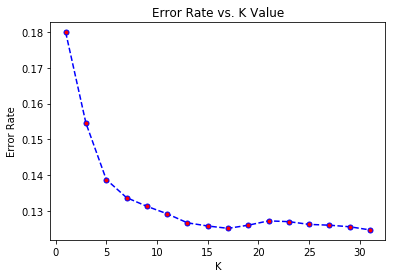

In [47]:
# Identify the best value for K using the elbow method
# The elbow method plots the error rate of a range of K values
error_rate = []

# Set the range of potential K values
# Run KNN for each K in the range
for i in range(1,32,2):
   
    knn = KNeighborsClassifier(n_neighbors = i)
    fit = knn.fit(X_train, y_train)
    pred_i = fit.predict(X_test)
    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))

    
# Plot the error rates and choose a K value
plt.plot(range(1,32,2), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### K value chosen is 7
#### Now let's test the P value for 1 and 2

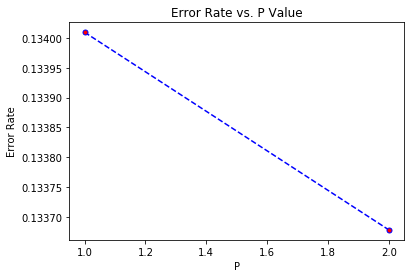

In [48]:
error_rate = []

# Set the range of potential P values
# Run KNN for each P in the range
for i in range(1,3):
   
    knn = KNeighborsClassifier(n_neighbors = 7, p = i)
    fit = knn.fit(X_train, y_train)
    pred_i = fit.predict(X_test)
    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))

    
# Plot the error rates and choose a P value
plt.plot(range(1,3), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. P Value')
plt.xlabel('P')
plt.ylabel('Error Rate')
plt.show()

### P value chosen is 2 (Euclidean Distance)

## Build the KNN with the default parameters

In [49]:
# Build the Decision Tree Model
knn = KNeighborsClassifier(n_neighbors = 5, # Default 5
                           weights = 'uniform', # Default uniform
                           metric = 'minkowski', # Default minkowski
                           p = 2 # Default 2
                          )

# Train the model on the training set
fit = knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(knn, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  86.13%
Cross Validation Accuracy:  85.79%
Model Fitting:  0.33% Overfitted
Error Rate:  13.87%



Confusion Matrix: 

[[1292   13    0  381]
 [   3 2654    0  290]
 [   0    0 1003    0]
 [ 305  267    0 2866]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.81      0.77      0.79      1686
    Defender       0.90      0.90      0.90      2947
  Goalkeeper       1.00      1.00      1.00      1003
  Midfielder       0.81      0.83      0.82      3438

   micro avg       0.86      0.86      0.86      9074
   macro avg       0.88      0.88      0.88      9074
weighted avg       0.86      0.86      0.86      9074



## Now build the KNN with the tuned parameters

In [50]:
# Build the Decision Tree Model
knn = KNeighborsClassifier(n_neighbors = 7, # Default 5
                           weights = 'uniform', # Default uniform
                           metric = 'minkowski', # Default minkowski
                           p = 2 # Default 2
                          )

# Train the model on the training set
fit = knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(knn, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  86.63%
Cross Validation Accuracy:  86.48%
Model Fitting:  0.15% Overfitted
Error Rate:  13.37%



Confusion Matrix: 

[[1290   12    0  384]
 [   2 2661    0  284]
 [   0    0 1002    1]
 [ 272  258    0 2908]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.82      0.77      0.79      1686
    Defender       0.91      0.90      0.91      2947
  Goalkeeper       1.00      1.00      1.00      1003
  Midfielder       0.81      0.85      0.83      3438

   micro avg       0.87      0.87      0.87      9074
   macro avg       0.89      0.88      0.88      9074
weighted avg       0.87      0.87      0.87      9074



## Outcome:
Tuning the model improves performance in all areas as seen by the output


## KNN 2: 60% Training Set, 40% Test Set

### Set the Features, Outcomes and Training/Test Set

In [51]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = df[feature_cols]

# Assign the outcomes
y = df.Position

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1984)

### Use the Elbow Method to find the best K
#### We're looking for the lowest value that gives us the lowest error rate

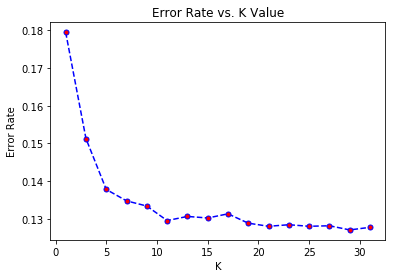

In [52]:
# Identify the best value for K using the elbow method
# The elbow method plots the error rate of a range of K values
error_rate = []

# Set the range of potential K values
# Run KNN for each K in the range
for i in range(1,32,2):
   
    knn = KNeighborsClassifier(n_neighbors = i)
    fit = knn.fit(X_train, y_train)
    pred_i = fit.predict(X_test)
    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))

    
# Plot the error rates and choose a K value
plt.plot(range(1,32,2), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### K value chosen is 7
#### Now let's test the P value for 1 and 2

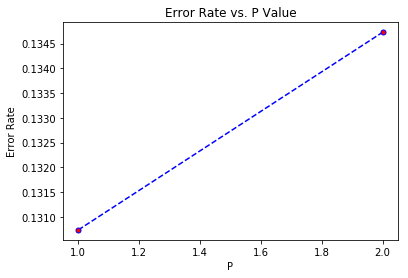

In [53]:
error_rate = []

# Set the range of potential P values
# Run KNN for each P in the range
for i in range(1,3):
   
    knn = KNeighborsClassifier(n_neighbors = 7, p = i)
    fit = knn.fit(X_train, y_train)
    pred_i = fit.predict(X_test)
    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))

    
# Plot the error rates and choose a P value
plt.plot(range(1,3), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. P Value')
plt.xlabel('P')
plt.ylabel('Error Rate')
plt.show()

### P value chosen is 1 (Manhattan Distance)

## Build the KNN with the default parameters

In [54]:
# Build the Decision Tree Model
knn = KNeighborsClassifier(n_neighbors = 5, # Default 5
                           weights = 'uniform', # Default uniform
                           metric = 'minkowski', # Default minkowski
                           p = 2 # Default 2
                          )

# Train the model on the training set
fit = knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(knn, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  86.22%
Cross Validation Accuracy:  85.79%
Model Fitting:  0.43% Overfitted
Error Rate:  13.78%



Confusion Matrix: 

[[1046   11    0  310]
 [   2 2101    0  223]
 [   0    0  809    0]
 [ 241  213    0 2303]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.81      0.77      0.79      1367
    Defender       0.90      0.90      0.90      2326
  Goalkeeper       1.00      1.00      1.00       809
  Midfielder       0.81      0.84      0.82      2757

   micro avg       0.86      0.86      0.86      7259
   macro avg       0.88      0.88      0.88      7259
weighted avg       0.86      0.86      0.86      7259



## Now build the KNN with the tuned parameters

In [55]:
# Build the Decision Tree Model
knn = KNeighborsClassifier(n_neighbors = 7, # Default 5
                           weights = 'uniform', # Default uniform
                           metric = 'minkowski', # Default minkowski
                           p = 1 # Default 2
                          )

# Train the model on the training set
fit = knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(knn, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  86.93%
Cross Validation Accuracy:  86.25%
Model Fitting:  0.67% Overfitted
Error Rate:  13.07%



Confusion Matrix: 

[[1057    9    0  301]
 [   3 2111    0  212]
 [   0    0  809    0]
 [ 220  204    0 2333]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.83      0.77      0.80      1367
    Defender       0.91      0.91      0.91      2326
  Goalkeeper       1.00      1.00      1.00       809
  Midfielder       0.82      0.85      0.83      2757

   micro avg       0.87      0.87      0.87      7259
   macro avg       0.89      0.88      0.88      7259
weighted avg       0.87      0.87      0.87      7259



## Outcome:
Tuning the model improves performance in all areas as seen by the output


## KNN 3: 80% Training Set, 20% Test Set

### Set the Features, Outcomes and Training/Test Set

In [56]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = df[feature_cols]

# Assign the outcomes
y = df.Position

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1984)

### Use the Elbow Method to find the best K
#### We're looking for the lowest value that gives us the lowest error rate

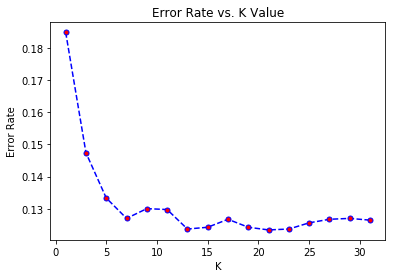

In [57]:
# Identify the best value for K using the elbow method
# The elbow method plots the error rate of a range of K values
error_rate = []

# Set the range of potential K values
# Run KNN for each K in the range
for i in range(1,32,2):
   
    knn = KNeighborsClassifier(n_neighbors = i)
    fit = knn.fit(X_train, y_train)
    pred_i = fit.predict(X_test)
    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))

    
# Plot the error rates and choose a K value
plt.plot(range(1,32,2), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### K value chosen is 7
#### Now let's test the P value for 1 and 2

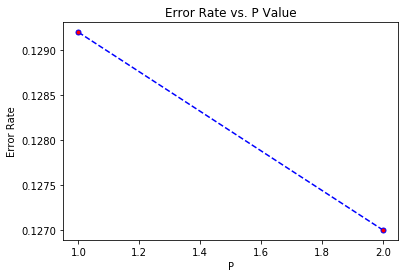

In [58]:
error_rate = []

# Set the range of potential P values
# Run KNN for each P in the range
for i in range(1,3):
   
    knn = KNeighborsClassifier(n_neighbors = 7, p = i)
    fit = knn.fit(X_train, y_train)
    pred_i = fit.predict(X_test)
    # Record the error value 
    error_rate.append(np.mean(pred_i != y_test))

    
# Plot the error rates and choose a P value
plt.plot(range(1,3), 
         error_rate,
         color = 'blue', 
         linestyle = 'dashed',
         markerfacecolor = 'red',
         marker = 'o',
         markersize = 5)

plt.title('Error Rate vs. P Value')
plt.xlabel('P')
plt.ylabel('Error Rate')
plt.show()

### P value chosen is 2 (Euclidean Distance)

## Build the KNN with the default parameters

In [59]:
# Build the Decision Tree Model
knn = KNeighborsClassifier(n_neighbors = 5, # Default 5
                           weights = 'uniform', # Default uniform
                           metric = 'minkowski', # Default minkowski
                           p = 2 # Default 2
                          )

# Train the model on the training set
fit = knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(knn, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  86.67%
Cross Validation Accuracy:  85.79%
Model Fitting:  0.87% Overfitted
Error Rate:  13.33%



Confusion Matrix: 

[[ 543    6    0  157]
 [   0 1028    0  106]
 [   0    0  402    0]
 [ 113  102    0 1173]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.83      0.77      0.80       706
    Defender       0.90      0.91      0.91      1134
  Goalkeeper       1.00      1.00      1.00       402
  Midfielder       0.82      0.85      0.83      1388

   micro avg       0.87      0.87      0.87      3630
   macro avg       0.89      0.88      0.88      3630
weighted avg       0.87      0.87      0.87      3630



## Now build the KNN with the tuned parameters

In [60]:
# Build the Decision Tree Model
knn = KNeighborsClassifier(n_neighbors = 7, # Default 5
                           weights = 'uniform', # Default uniform
                           metric = 'minkowski', # Default minkowski
                           p = 2 # Default 2
                          )

# Train the model on the training set
fit = knn.fit(X_train, y_train)

# Test the model on the test set
y_pred = fit.predict(X_test)

# Build a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cross Validate the model with 10 folds
cv_scores = cross_val_score(knn, X, y, cv=10)

# Set the accuracy to a variable
acc = metrics.accuracy_score(y_test, y_pred)

# Set the error rate to a variable
err = np.mean(y_pred != y_test)

# Set the cross validation mean score to a variable
cvm = np.mean(cv_scores)

# Calculate the differece between the Accuracy and CV Accuracy
dif = acc-cvm

# Determine if model is underfitted or overfitted
if dif < 0:
    underover = "Underfitted"
else:
    underover = "Overfitted"

print "Model Accuracy: ",str(round(acc*100,2))+"%"
print "Cross Validation Accuracy: ",str(round(cvm*100,2))+"%"
print "Model Fitting: ",str(round(dif*100,2))+"%",underover
print "Error Rate: ",str(round(err*100, 2))+"%"
print "\n\n\nConfusion Matrix: \n\n",cm
print "\n\n\nClassification Report:\n\n",classification_report(y_test, y_pred)

Model Accuracy:  87.3%
Cross Validation Accuracy:  86.48%
Model Fitting:  0.82% Overfitted
Error Rate:  12.7%



Confusion Matrix: 

[[ 553    4    0  149]
 [   0 1032    0  102]
 [   0    0  401    1]
 [ 104  101    0 1183]]



Classification Report:

              precision    recall  f1-score   support

    Attacker       0.84      0.78      0.81       706
    Defender       0.91      0.91      0.91      1134
  Goalkeeper       1.00      1.00      1.00       402
  Midfielder       0.82      0.85      0.84      1388

   micro avg       0.87      0.87      0.87      3630
   macro avg       0.89      0.89      0.89      3630
weighted avg       0.87      0.87      0.87      3630



## Outcome:
Tuning the model improves performance in all areas as seen by the output

## KNN Outcome:
The best performing model was the one built on the 80% training set based on the output of each model. 

## Model Outcome:
The best performing model overall was the KNN model built on the 80% training set based on the output of each model. 